Surface deformations
====================
This notebook shows how to use the `Plots.jl` Julia package to generate `.gifs` of deformations of surfaces in $\mathbb{R}^3$.

In [1]:
# use Plots and LinearAlgebra
using LinearAlgebra
using Plots

# Plotting surfaces
Here we define a function `surf_plot` which takes as input arrays `X, Y` and a function (or array of functions) `f` and plots them.

In [56]:
function surf_plot(X, Y, f, z_lim)
    Z = map(f[1], X, Y)
    x = X[1, :]
    y = Y[:, 1]
    surface(x, y, Z, framestyle = :zerolines)
    for i in 2:length(f)
        Z = map(f[i], X, Y)
        surface!(x, y, Z, framestyle = :zerolines)
    end
    xlabel!("x")
    ylabel!("y")
    xlims!(x[1], x[length(x)])
    ylims!(y[1], y[length(y)])
    zlims!(z_lim[1], z_lim[2])
end

surf_plot (generic function with 2 methods)

# Generating `.gifs`
Now we use `Plots.jl`'s handy `@gif`. We'll encode a surface deformation as a parameterized family of functions $f(x, y, c)$, encoded as a function $h \colon \mathbb{R} \to \mathrm{Functions}(\mathbb{R}^2, \mathbb{R})$ taking $c \mapsto f(x, y, c)$.

To prevend the $z$ limits from jumping around, we compute their max and min values.

In [54]:
function surf_defo(x, y, h, c)
    X = ones(length(y))*transpose(x)
    Y = y*transpose(ones(length(x)))
    
    zmin = zeros(length(c))
    zmax = zeros(length(c))
    for i in 1:length(c)
        f = h(c[i])
        Z = zeros(length(y), length(x), length(f))
        for j in 1:length(f)
        Z[:, :, j] = map(f[j], X, Y)
        end
        zmin[i] = minimum(Z)
        zmax[i] = maximum(Z)
    end
    z_lim = [minimum(zmin), maximum(zmax)]
    
    @gif for i in 1:length(c)
        f = h(c[i])
        surf_plot(X, Y, f, z_lim)
    end
end 

surf_defo (generic function with 1 method)

# Writing down a deformation
Here's an example of the deformation $z^2 - \frac{x^2}{4} - \frac{y^2}{9} = c$ for $c \in [-1, 1]$.

In [40]:
function cone(c)
    function fp(x, y)
        if c + (1/4)x^2 + (1/9)y^2 < 0
            return NaN
            else return sqrt(c + (1/4)x^2 + (1/9)y^2)
        end
    end
    fm(x, y) = -fp(x, y)
    return [fp, fm]
end        

cone (generic function with 1 method)

# Rendering a deformation
Here we finally run the above functions. For best results a very fine $xy$ grid is used ... this might take a while.

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/charlie/.julia/packages/Plots/F2agT/src/backends/gr.jl:491
┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/charlie/.julia/packages/Plots/F2agT/src/backends/gr.jl:491
┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/charlie/.julia/packages/Plots/F2agT/src/backends/gr.jl:491
┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/charlie/.julia/packages/Plots/F2agT/src/backends/gr.jl:491
┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/charlie/.julia/packages/Plots/F2agT/src/backends/gr.jl:491
┌ Warning: Multiple series with different color share a colo

Plots.AnimatedGif("/home/charlie/Documents/Teaching/Math126Summer2020/Materials/Slides/tmp.gif")
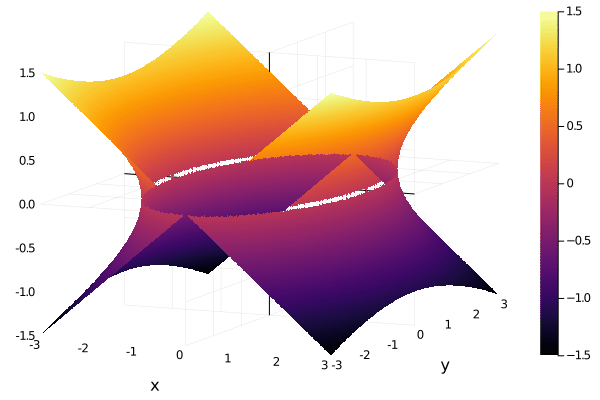

In [65]:
x = -3:0.001:3
y = -3:0.001:3
c = [-1:0.01:0; zeros(10); 0:0.01:1]
surf_defo(x, y, cone, c)

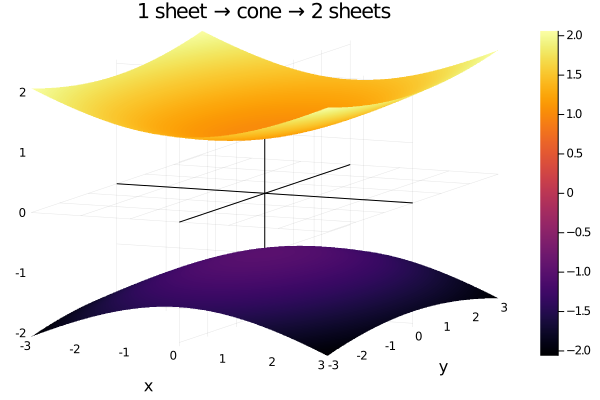

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/charlie/.julia/packages/Plots/F2agT/src/backends/gr.jl:491


In [66]:
title!("1 sheet → cone → 2 sheets")